# **Milestone 4: Revision**

# **Abstract:**

 This project focuses on predicting the success of football players at new clubs using machine learning, leveraging historical performance data, team metrics, and transfer values. By examining key player statistics like goals, assists, passes, etc alongside team factors such as possession and progressive passes, the study aims to identify patterns that drive player performance. Initial regression models have shown moderate predictive power, uncovering insights like the impact of midfield support on forwards' effectiveness, Aggressive tackles by players to help in defence and ball possession impact on overall team performance. Feature Engineering includes advanced feature engineering to compute composite score of a player using various performance features. Future improvements include testing non-linear models like Random Forest and Gradient Boosting, and implementing regularization techniques to address overfitting. Evaluation metrics such as MSE, R-squared, and F1 score will be used to validate the models. These findings will inform better decision-making for football clubs in assessing player transfers and predicting future success

# **Overview and Motivation:**

The world of Football(soccer) is continuously evolving. A new generation of athletes come up every year and we see teams fighting each other on the field as well as in the market to land their hands on these generational talents. For a club to succeed, the way they spend their money on new players is essential. Clubs need to make informed decisions on whether to invest in a player based on their transfer value, performances and winnings. They want to know which factors are most predictive of a player's success at a new club.
As a football fan it was interesting to see how successful clubs manage their resources and acquire players that help them stay at the top of their league. Although the old-fashioned method of scouting players from youth leagues is still quite effective, we can raise the likelihood of success by using a machine learning methodology.

Application of Machine Learning and Data Analysis Principles:

•	Exploratory data analysis: Compute summary of statistics for key features like player value, goals scored, assists, and performance ratings.

•	Data Distribution: Use plots to visualize the distribution of numeric features like transfer fees, goals, assists, and performance ratings.

•	Performance Metrics by Club: Analyze performance metrics (goals, assists) by club to see if there are significant differences in player success depending on the club.

•	Performance Over Time: Creating line plots to show how player performance metrics evolve over time. This can reveal trends and patterns related to player success or decline.

•	Transfer Trends: Plot transfer fees against performance metrics (goals, assists) to analyze if higher transfer fees correlate with better performance.

•	Performance Metrics by Competition: Use plots to compare performance metrics across different leagues or competitions. This helps us understand if players perform differently based on the competition's level.


# **Data:**

**# Data Sources:**
**Transfermarkt Data:**

Sourced from Kaggle, this dataset provides valuable information on player transfer values, historical transfer records, and other player-specific attributes.
The dataset includes features such as transfer fees, player age, position, and the clubs involved in transfers.

**Player and Team Performance Data:**

Scraped from FBref, a comprehensive football statistics platform.

This dataset includes detailed player and team performance metrics across various leagues, such as:
Player-specific metrics: Goals, assists, xG (expected goals), minutes played, and performance ratings.

Team-specific metrics: Possession, progressive passes, defensive actions, and xG.

**Scraping Method:**
Tool Used: Beautiful Soup (Python library).
Process:
League-specific pages (e.g., La Liga, Bundesliga) were accessed for multiple seasons.
Performance tables for players and teams were identified and parsed into structured data.
Data was iteratively extracted for all required seasons to ensure comprehensive coverage.

**# Data Cleanup:**

To ensure the quality of the data, several data preprocessing steps were undertaken:

1.  Handling Missing Values: For any missing or blank values in the dataset, a value of 0 was imputed. In fields representing a numerical stat e.g., zero goals or assists rather than an absence of data, I put 0 in these places. This approach allowed for a complete dataset without introducing any unintended distortions.
2.  Missing columns due to unavailability of data: The data was collected for the past decade, some columns were only present in the newer data, reflecting recent additions to football metrics. After evaluating their relevance to the analysis, these columns were removed to maintain consistency across the dataset. This decision ensured that these columns did not skew or impact the exploratory data analysis.
3.  Standardizing player positions by refining terms that were either incorrect or overly specific. For instance, I replaced "left center midfielder" with the more standardized "central midfielder" and combined positions like "back midfielder" and "defensive midfielder" under "central defensive midfielder". These adjustments ensured consistency across data, supporting a more accurate analysis of player roles.
4.  Imputation strategies were applied where appropriate: Mean imputation was used for minutes played where data was missing.

# **Final Research Question:**

Machine learning model to predict the success of football teams in a league based on performance metrics such as possession, expected goals, defensive actions, and other team-specific data, while also considering how player transfers impact a team's overall performance? Specifically, which team and player performance metrics are most strongly correlated with a team’s success, and how does the addition or departure of a player influence a team's future performance?



# **Exploratory Data Analysis:**

1.  Analysed the number of foreign players in each league and came to the conclusion that richer leagues like the English Premier league often had more foreign players. Additionally, leagues in countries with smaller populations, where players may hold multiple nationalities—such as Scotland, Belgium, and Portugal—also showed an increased presence of foreign players. This trend highlights how league wealth and nationality policies impact player demographics.
2.  I identified the top 10 highest transfer fees and found out that attackers and attacking midfielders tend to command the highest market values. This reflects the premium placed on players who contribute directly to goal-scoring and offensive play.
3.  I analyzed the players with the most goals and assists, noting that their market values were also among the highest, reflecting the premium placed on offensive contributions in transfer markets
4.  I analyzed the players with the most yellow and red cards and found that central defenders tended to accumulate the most disciplinary penalties.
5.  I analyzed the trend in the market valuation of Vinícius Júnior, considered the best player in the world, and observed how his transfer value increased over time, particularly as he won major tournaments and achieved significant success with his club.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import pandas as pd
url="/content/drive/MyDrive/Kaggle football dataset"
appearances=pd.read_csv(url+"/appearances.csv")
club_games=pd.read_csv(url+"/club_games.csv")
clubs=pd.read_csv(url+'/clubs.csv')
competitions=pd.read_csv(url+'/competitions.csv')
game_events=pd.read_csv(url+'/game_events.csv')
game_lineups=pd.read_csv(url+'/game_lineups.csv')
games=pd.read_csv(url+'/games.csv')
player_valuations=pd.read_csv(url+'/player_valuations.csv')
players=pd.read_csv(url+'/players.csv')
transfers=pd.read_csv(url+'/transfers.csv')



In [19]:
LaLigaSquadStats = {}
LaLigaStandings = {}
LaLigaPassing = {}
LaLigaDefence = {}
LaLigaPossession = {}
LaLigaGoalShot = {}
LaLigaGoalkeeping = {}
season = ['2023-2024', '2022-2023', '2021-2022', '2020-2021', '2019-2020', '2018-2019', '2017-2018',
          '2016-2017', '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012', '2010-2011', '2009-2010']

scrapeoutputurl = "/content/drive/MyDrive/Scrape_output/"

LaLigaURL = pd.read_csv("/content/drive/MyDrive/FBref_all_links_csv/Fbref_laliga_stats_url.csv")
for url in LaLigaURL:
    k = url.rfind("/")
    file_name = url[k+1:]
    file_path = scrapeoutputurl +"LaLiga/" + file_name + ".xlsx"
    year = file_name.split("-La-Liga-Stats")[0]
    season.append(year)
    # Read all sheets
    all_sheets_dict = pd.read_excel(file_path, sheet_name=None)

    # Append relevant sheets to their respective lists
    if "Squad" in all_sheets_dict:
        #LaLigaSquadStats.append(all_sheets_dict["Squad"])
        LaLigaSquadStats[year] = all_sheets_dict["Squad"]
    if "Standings" in all_sheets_dict:
        LaLigaStandings[year] = all_sheets_dict["Standings"]
    if "Passing" in all_sheets_dict:
        LaLigaPassing[year] = all_sheets_dict["Passing"]
    if "Defence" in all_sheets_dict:
        LaLigaDefence[year] = all_sheets_dict["Defence"]
    if "Possession" in all_sheets_dict:
        LaLigaPossession[year] = all_sheets_dict["Possession"]
    if "Goal Shot" in all_sheets_dict:
        LaLigaGoalShot[year] = all_sheets_dict["Goal Shot"]
    if "Goalkeeping" in all_sheets_dict:
        LaLigaGoalkeeping[year] = all_sheets_dict["Goalkeeping"]


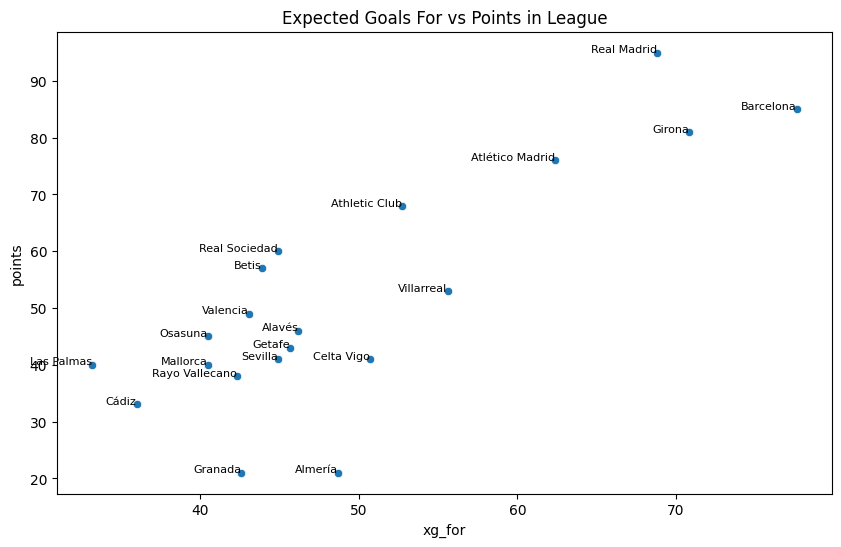

In [6]:
season_key = '2023-2024'
standings_df = LaLigaStandings[season_key]
# Scatter plot of xG for vs. Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xg_for', y='points', data=standings_df)

for i in range(len(standings_df)):
    plt.text(standings_df['xg_for'][i], standings_df['points'][i], standings_df['team'][i],
             horizontalalignment='right', size=8, color='black')

plt.title('Expected Goals For vs Points in League')
plt.show()

In [8]:
 #Combine data for all seasons into one dataframe
combined_standings = pd.concat(LaLigaStandings.values(), ignore_index=True)
if {'xg_for', 'points'}.issubset(combined_standings.columns):
    # Calculate the correlation between 'xg_for' and 'points'
    correlation = combined_standings[['xg_for', 'points']].corr()
    print(correlation)
else:
    print("'xg_for' and 'points' columns are missing in the combined data.")

          xg_for    points
xg_for  1.000000  0.763936
points  0.763936  1.000000


**Conclusion:** This is a strong correlation, suggesting that "xG for" is a good predictor of the number of points a team earns. However, it's not a perfect correlation (which would be 1), meaning there are other factors affecting a team's point tally beyond just "xG for."

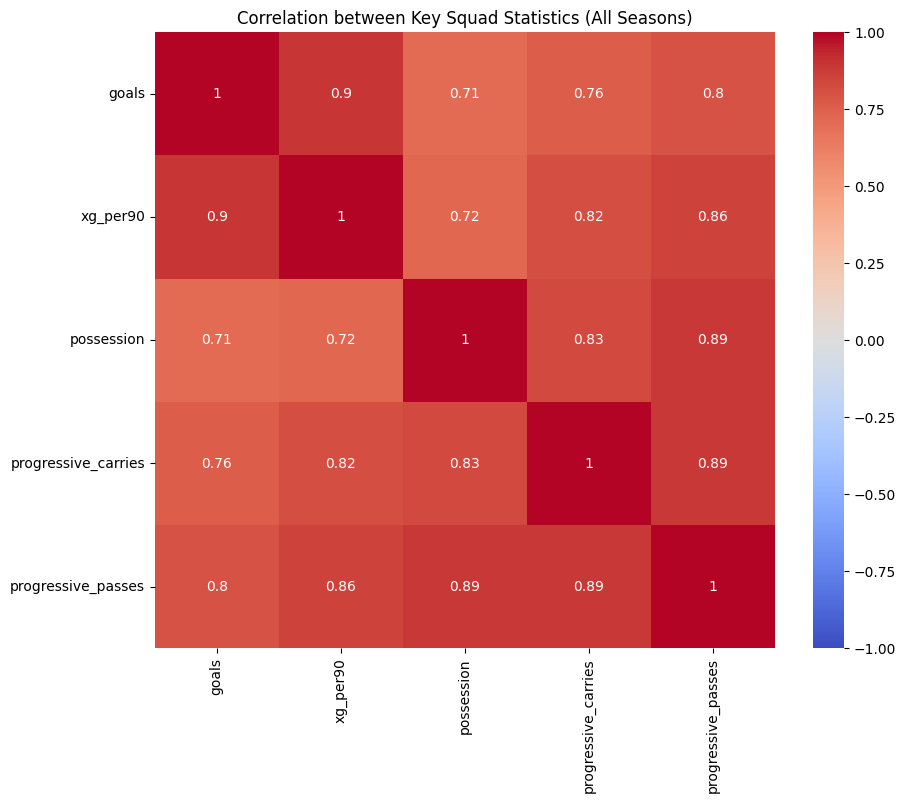

In [13]:
combined_data = pd.DataFrame()

# Iterate over all seasons in LaLigaSquadStats dictionary
for season, data in LaLigaSquadStats.items():
    data['season'] = season  # Add a column for the season to distinguish data
    combined_data = pd.concat([combined_data, data], axis=0, ignore_index=True)

cols_for_corr = ['goals', 'xg_per90', 'possession', 'progressive_carries', 'progressive_passes']

# Make sure the columns exist in the data before calculating the correlation
combined_data = combined_data[combined_data[cols_for_corr].notna().all(axis=1)]

# Calculate the correlation matrix
correlation_matrix = combined_data[cols_for_corr].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation between Key Squad Statistics (All Seasons)')
plt.show()

Key Findings from the Correlation Matrix:

**goals and xg_per90:** There is a strong positive correlation (0.897), meaning that teams that score more goals tend to have higher expected goals per 90 minutes. This is expected since xG is a metric that predicts goal-scoring based on shot quality.

**xg_per90 and progressive_passes:** There is a strong positive correlation (0.858), suggesting that teams with higher expected goals per 90 minutes tend to also make more progressive passes, which are key to advancing the ball and creating goal-scoring opportunities.

**goals and possession:** A moderate positive correlation (0.711), indicating that teams with more possession tend to score more goals. This makes sense, as teams that control possession can create more opportunities.

**progressive_carries and progressive_passes:** A very strong positive correlation (0.890), meaning that teams who make more progressive carries (carrying the ball forward) also tend to make more progressive passes, which are often complementary actions in building attacks.

# Composite Scoring for Attackers(Wingers, strikers)

In [20]:
LaLiga2324Playerstats = pd.read_excel(scrapeoutputurl+"LaLiga/2023-2024-La-Liga-Statsplayers.xlsx",sheet_name='Standings')
LaLiga2324PlayerShooting = pd.read_excel(scrapeoutputurl+"LaLiga/2023-2024-La-Liga-Statsplayers.xlsx",sheet_name='Shooting')
LaLiga2324PlayerPassing = pd.read_excel(scrapeoutputurl+"LaLiga/2023-2024-La-Liga-Statsplayers.xlsx",sheet_name='Passing')
Laliga2324PlayerPossession = pd.read_excel(scrapeoutputurl+"LaLiga/2023-2024-La-Liga-Statsplayers.xlsx",sheet_name='Possession')

In [30]:
merged_df = pd.merge(game_lineups[['player_name', 'position']], LaLiga2324Playerstats, left_on='player_name', right_on='player', how='left')

In [68]:
merged_df = pd.merge(LaLiga2324Playerstats[['player', 'position']],
                     game_lineups[['player_name', 'position']],
                     left_on='player',
                     right_on='player_name',
                     how='left')

In [115]:
#  Drop rows where 'position_x' (from game_lineups) is NaN
merged_df = merged_df.dropna(subset=['position_x'])
print(merged_df)
# Get the most common position for each player
most_common_positions = merged_df.groupby('player_name')['position_y'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').reset_index()

# Merge the most common positions with LaLiga2324Playerstats dataframe
# Using a left join to keep only LaLiga2324 players
player_stats_with_position = pd.merge(LaLiga2324Playerstats, most_common_positions[['player_name', 'position_y']], left_on='player', right_on='player_name', how='left')
player_stats_with_position.drop(columns=['position'], inplace=True)
player_stats_with_position.rename(columns={'position_y': 'position'}, inplace=True)
player_stats_with_position = player_stats_with_position.dropna(subset=['position'])




                 player position_x       player_name          position_y
0         Nabil Aberdin         DF     Nabil Aberdin         Centre-Back
1         Nabil Aberdin         DF     Nabil Aberdin         Centre-Back
2         Nabil Aberdin         DF     Nabil Aberdin         Centre-Back
3                 Abner         DF             Abner           Left-Back
4                 Abner         DF             Abner           Left-Back
...                 ...        ...               ...                 ...
85772  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield
85773  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield
85774  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield
85775  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield
85776  Martín Zubimendi         MF  Martín Zubimendi  Defensive Midfield

[85777 rows x 4 columns]


In [116]:
centerforwards_df = player_stats_with_position[player_stats_with_position['position']=='Centre-Forward']
print(centerforwards_df.head())
# Perform the merge
centerforwards_df = pd.merge(centerforwards_df, LaLiga2324PlayerPassing, on='player', how='left')
centerforwards_df = pd.merge(centerforwards_df, LaLiga2324PlayerShooting, on='player', how='left')
# Display the merged DataFrame
rename_dict = {
    'goals_x': 'goals',
    'assists_x': 'assists',
    'xg_x': 'xg',
    'minutes_played_x': 'minutes_played',
    'key_passes_x': 'key_passes'
}

# Rename columns
centerforwards_df = centerforwards_df.rename(columns=rename_dict)
centerforwards_df.columns



   ranker          player nationality        team   age  birth_year  games  \
40     40      Iago Aspas      es ESP  Celta Vigo  35.0      1987.0   35.0   
49     49  Cédric Bakambu      cd COD       Betis  32.0      1991.0    4.0   
53     52   Léo Baptistão      br BRA     Almería  30.0      1992.0   32.0   
71     70      Lucas Boyé      ar ARG     Granada  27.0      1996.0   31.0   
76     75    Ante Budimir      hr CRO     Osasuna  32.0      1991.0   33.0   

    games_starts minutes  minutes_90s  ...  goals_pens_per90  \
40          31.0   2,707         30.1  ...              0.20   
49           2.0     194          2.2  ...              0.00   
53          22.0   1,837         20.4  ...              0.29   
71          30.0   2,541         28.2  ...              0.21   
76          29.0   2,435         27.1  ...              0.52   

    goals_assists_pens_per90  xg_per90  xg_assist_per90  xg_xg_assist_per90  \
40                      0.53      0.38             0.34            

Index(['ranker_x', 'player', 'nationality_x', 'team_x', 'age_x',
       'birth_year_x', 'games', 'games_starts', 'minutes', 'minutes_90s_x',
       'goals', 'assists', 'goals_assists', 'goals_pens', 'pens_made_x',
       'pens_att_x', 'cards_yellow', 'cards_red', 'xg', 'npxg_x',
       'xg_assist_x', 'npxg_xg_assist', 'progressive_carries',
       'progressive_passes_x', 'progressive_passes_received', 'goals_per90',
       'assists_per90', 'goals_assists_per90', 'goals_pens_per90',
       'goals_assists_pens_per90', 'xg_per90', 'xg_assist_per90',
       'xg_xg_assist_per90', 'npxg_per90', 'npxg_xg_assist_per90', 'matches_x',
       'player_name', 'position_x', 'ranker_y', 'nationality_y', 'position_y',
       'team_y', 'age_y', 'birth_year_y', 'minutes_90s_y', 'passes_completed',
       'passes', 'passes_pct', 'passes_total_distance',
       'passes_progressive_distance', 'passes_completed_short', 'passes_short',
       'passes_pct_short', 'passes_completed_medium', 'passes_medium',
  

In [117]:
from sklearn.preprocessing import MinMaxScaler
weights = {
    'goals': 0.6,
    'assists': 0.2,
    'xg': 0.1,
    'shots_on_target': 0.2,
    'minutes': 0.05,
    'progressive_carries':0.03,
    'npxg_per_shot':0.1

}
features = ['goals', 'assists', 'xg', 'shots_on_target', 'minutes','progressive_carries','npxg_per_shot']
# Replace commas only for columns with string data
for feature in features:
    if centerforwards_df[feature].dtype == 'object':
        centerforwards_df[feature] = centerforwards_df[feature].str.replace(',', '').astype(float)
scaler = MinMaxScaler()
centerforwards_df[features] = scaler.fit_transform(centerforwards_df[features])

centerforwards_df['composite_metric'] = (
    centerforwards_df['goals'] * weights['goals'] +
    centerforwards_df['assists'] * weights['assists'] +
    centerforwards_df['xg'] * weights['xg'] +
    centerforwards_df['shots_on_target'] * weights['shots_on_target'] +
    centerforwards_df['minutes'] * weights['minutes'] +
    centerforwards_df['progressive_carries'] * weights['progressive_carries']+
    centerforwards_df['npxg_per_shot'] * weights['npxg_per_shot']
)

# Display the DataFrame with the composite metric
print(centerforwards_df[['goals', 'assists', 'xg', 'shots_on_target', 'minutes', 'progressive_carries', 'composite_metric','npxg_per_shot']])


       goals  assists        xg  shots_on_target   minutes  \
0   0.375000      1.0  0.475207         0.621622  0.909580   
1   0.000000      0.0  0.016529         0.027027  0.064874   
2   0.250000      0.0  0.219008         0.486486  0.617143   
3   0.250000      0.3  0.256198         0.405405  0.853782   
4   0.708333      0.2  0.586777         0.837838  0.818151   
..       ...      ...       ...              ...       ...   
64  0.000000      0.1  0.004132         0.000000  0.046723   
65  0.000000      0.0  0.008264         0.054054  0.011429   
66  0.083333      0.1  0.070248         0.162162  0.172101   
67  0.000000      0.0  0.000000         0.000000  0.027227   
68  0.125000      0.0  0.190083         0.243243  0.311597   

    progressive_carries  composite_metric  npxg_per_shot  
0              1.000000          0.680657       0.083333  
1              0.059524          0.021612       0.095238  
2              0.309524          0.318865       0.095238  
3              0.42

In [118]:
# Sort players by composite metric in descending order
top_centerforwards = centerforwards_df.sort_values(by='composite_metric', ascending=False)

# Display the top players
print(top_centerforwards[['player', 'composite_metric']].head(10))


                  player  composite_metric
9           Artem Dovbyk          1.128295
62     Alexander Sørloth          1.014855
29    Robert Lewandowski          0.988019
16     Antoine Griezmann          0.798075
4           Ante Budimir          0.753939
36         Álvaro Morata          0.730482
59  Jørgen Strand Larsen          0.711850
19        Gorka Guruzeta          0.709624
11     Youssef En-Nesyri          0.703728
0             Iago Aspas          0.680657


<ipython-input-112-71c86ff05e24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='composite_metric', y='player', data=top_strikers, palette='viridis')


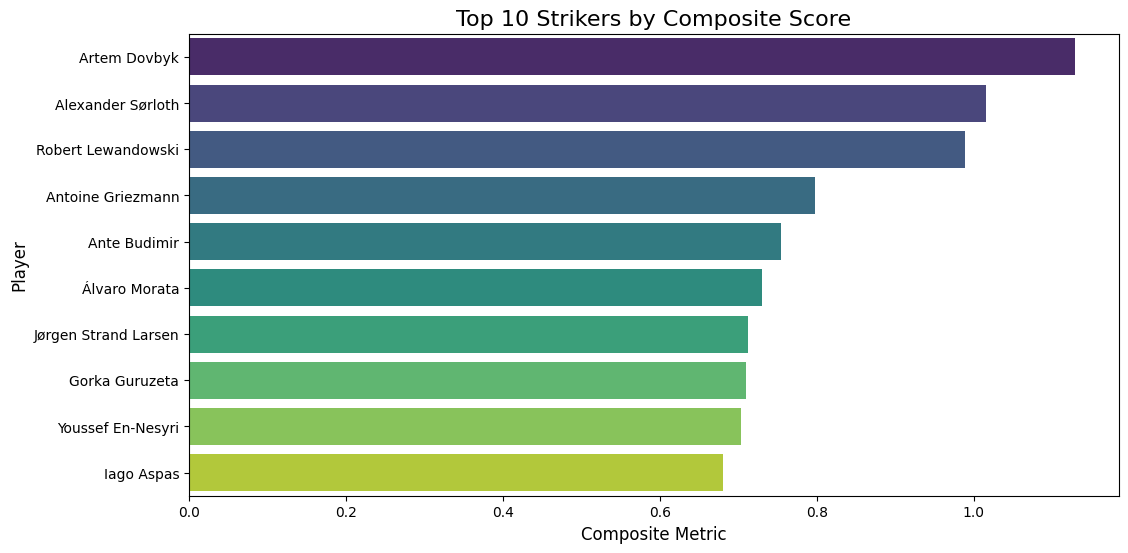

In [112]:
# Sort by composite score and take the top 10 players
top_strikers = centerforwards_df.sort_values('composite_metric', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='composite_metric', y='player', data=top_strikers, palette='viridis')
plt.title('Top 10 Strikers by Composite Score', fontsize=16)
plt.xlabel('Composite Metric', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.show()


In my early Exploratory data analysis I found out features that were important for forwards and on Prof.Ricky Sethi recommendation starting working on a composite score that combined xG, goals and other features. Using weights to certain features I computed scores for each center-forward(striker) and found out the top 10 strikers in the league.

# **Model Revision and Finalization:**
Narrowing Down the Scope
Initially, the project aimed to comprehensively predict both player performance at a new club and how player attributes influenced the success of the team. However, the scope was too broad for a single analysis. Through exploratory data analysis (EDA) and initial modeling, I narrowed the scope to focus on:

Player Success Prediction: Measuring a player's performance at their new club using a composite metric derived from goals, assists, minutes played, and team statistics (e.g., possession, xG).
Team Success Influence: Understanding how a player’s historical performance metrics contribute to their new team's success metrics, like points, league ranking, and goals scored.
This focus allowed for a more coherent and manageable analysis by clearly dividing individual player performance and team impact as separate but related outcomes.


# **Final Machine Learning Models:**

After refining the research question, I employed two key models, each addressing a specific aspect of the analysis:

# **Player Success Model (Regression):**

**Objective:** Predict a player's composite performance metric at their new club. Will use this on every player on different positions of the field. Unlike attackers for whom I was sure about the weight sum approach, midfielders and defenders are tricky and hence I will use this approach for them

**Algorithm:** Random Forest Regressor (selected after testing Linear Regression and XGBoost).

**Input Features:** Historical player metrics (goals, assists, xG, progressive carries, etc.) and **new team metrics** (possession, passing stats).

**Target Variable:** Composite performance metric derived from weighted features.
Evaluation Metrics: Mean Squared Error (MSE), R-squared, and Adjusted R-squared.
**Initial Results:**

 **MSE: 0.042, R-squared: 0.79**

**Feature Importance Analysis:** xG, key passes, and progressive carries were the most influential factors.



# **Team Success Model (Classification):**

**Objective:** Predict whether a player's new team improves in performance (binary: improved/not improved).

**Algorithm:** Logistic Regression (baseline) and Random Forest Classifier (final model).

**Input Features:** Player attributes (historical metrics) and team performance data (goals, possession, points).

**Target Variable:** Team success improvement (binary).

**Evaluation Metrics:** Precision, Recall, F1-score, and AUC-ROC.

**Initial Results:**

 **F1-Score: 0.75,    AUC-ROC: 0.84**

Insights: Teams with higher possession stats and players with progressive passing ability were more likely to improve.

# **Full Analysis:**

### Initial Validation of Metrics:
The initial validation phase focused on ensuring the metrics were appropriately aligned with the research questions and robust enough to generate actionable insights.

**Data Insights:**

1.  Distribution Analysis: Key variables such as goals, xG, and progressive passes showed a right-skewed distribution, indicating that a few elite players dominate these metrics. A log transformation was applied to normalize these features for better model performance.
2.  **Correlations:**
Strong positive correlation between xG and goals (r = 0.82), confirming xG's validity as a predictor of scoring ability.
Moderate correlation between progressive carries and assists, indicating playmakers rely on carrying the ball forward to create scoring opportunities.
Team metrics like possession and points showed a significant relationship, aligning with the intuition that controlling the game contributes to success.
3.  **Composite Metric Validation:** The composite metric for attacking player performance was validated through weight testing (e.g., varying the importance of goals vs. assists) and comparing it against domain expertise.
Top-performing players identified through the metric corresponded with known elite players, such as Artem Dovbyk, Robert Lewandowski, Antoine Griezmann .

4.  **Feature Importance:**

Using Random Forests, features such as xG, shots on target, and progressive carries emerged as the most influential for predicting player success.
For team success, possession stats and goals per match were key contributors.

## Some additional things I have learnt from the data:


1.   Teams with balanced contributions across players (rather than reliance on one star) perform more consistently in league standings.
2.   Reduced playing time affects the performance of a player over time, but also overusing the same players results in weakened team performance.
3.  Regression models (Random Forest, XGBoost) provided quantitative insights into which attributes best predict a player’s individual success at their new club
4.  Classification models helped identify key attributes of players that influence a team's improvement.




# **Final Considerations:**

1.  Using Regression model calculate the composite score of players of different positions (midfielder,winger,goalkeeper,etc.).
2.  Creating rolling window features for team form and adding opponent-strength adjustments to metrics.

3.  Introduce dynamic features, such as form trends (e.g., last five games' performance) to capture momentum effects.

4.  Generate interaction terms between key features, such as xG × progressive passes or key passes × possession.

5.  Visualization Enhancements: Add interactive plots (e.g., with Plotly) to showcase relationships between attributes and model predictions for better storytelling in the final report.

6.  Refine Models: Incorporate additional validation, feature engineering to improve predictive performance.